## Exploring the Filipino Family Income and Expenditure Dataset [In Progress]
Kaggle Competition and dataset details: https://www.kaggle.com/grosvenpaul/family-income-and-expenditure

<i>Please let me know if there are any errors or if anything can be further improved upon. </i>

The outline for this kernel is as follows:
1. <b>Exploratory Data Analysis and Data Visualization</b> 
2. <b>Data Pre-processing</b> 
3. <b>Prediction of Household Income</b> 
    - <i>Classification Task</i>: Group new instances as either low or high income 
    - <i>Regression Task</i>: Predict the total household income variable

In [1]:
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
import pandas as pd
import numpy as np

In [126]:
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from matplotlib import rcParams
rcParams['axes.titlepad'] = 40

In [3]:
#df = pd.read_csv("../input/Family Income and Expenditure.csv")
df = pd.read_csv("Family-Income-and-Expenditure.csv")

In [4]:
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
Total Household Income                           41544 non-null int64
Region                                           41544 non-null object
Total Food Expenditure                           41544 non-null int64
Main Source of Income                            41544 non-null object
Agricultural Household indicator                 41544 non-null int64
Bread and Cereals Expenditure                    41544 non-null int64
Total Rice Expenditure                           41544 non-null int64
Meat Expenditure                                 41544 non-null int64
Total Fish and  marine products Expenditure      41544 non-null int64
Fruit Expenditure                                41544 non-null int64
Vegetables Expenditure                           41544 non-null int64
Restaurant and hotels Expenditure                41544 non-null int64
Alcoholic Beverages Expenditure                  

## Inspecting the Variables
If we want to better understand our data, we first need to understand the meaning and relevance of the variables. Remember that the target variable we are trying to predict is `Total Household Income`. Thus, for each variable, we ask ourselves:
- <i>Do we consider this variable when attempting to predict household income? </i>
- <i>If so, how relevant is this variable in determining our target variable?</i>

We can roughly group the different variables based on the information they provide as follows:
- <b>Expenditures</b> - describes the amount of spending allocated to a certain commodity 
- <b>Household/Family</b>- type of family, number, age, and employment status of family members
- <b>Household Head</b> - age, sex, marital status, education of the household breadwinner
- <b>House Information</b> - describes the physical structure of the house
- <b>Number of Goods Owned</b> - e.g. fridges, washing machines, television sets

In [6]:
df.describe()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,...,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,...,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,...,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.911385e+05,105635.500000,1.000000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,19921.250000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,1.181599e+07,827565.000000,2.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,725296.000000,...,5.000000,3.000000,5.000000,5.000000,4.000000,10.000000,6.000000,3.000000,3.000000,5.000000


In [7]:
df.describe(include=['O'])

,Region,Main Source of Income,Household Head Sex,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Type of Building/House,Type of Roof,Type of Walls,Tenure Status,Toilet Facilities,Main Source of Water Supply
count,41544,41544,41544,41544,41544,41544,34008,34008,41544,41544,41544,41544,41544,41544,41544
unique,17,3,2,6,46,2,378,7,3,6,7,6,8,8,11
top,IVA - CALABARZON,Wage/Salaries,Male,Married,High School Graduate,With Job/Business,Farmhands and laborers,Self-employed wihout any employee,Single Family,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...","Own use, faucet, community water system"
freq,4162,20388,32483,31347,9628,34008,3478,13766,28445,39069,33342,27739,29541,29162,16093


### Total Household Income
Let's start by taking a closer look at our target variable.

In [8]:
target = 'Total Household Income'
df[target].describe()

count    4.154400e+04
mean     2.475556e+05
std      2.868805e+05
min      1.128500e+04
25%      1.048950e+05
50%      1.640795e+05
75%      2.911385e+05
max      1.181599e+07
Name: Total Household Income, dtype: float64

It's easier to understand household income in terms of monthly salaries:

In [9]:
df[target] = df[target]/12
target_new = 'Total Household Income (Monthly)'
df = df.rename(columns={target:target_new})
target = target_new
df[target] = df[target].astype(float)
df[target].describe()

count     41544.000000
mean      20629.632067
std       23906.710221
min         940.416667
25%        8741.250000
50%       13673.291667
75%       24261.541667
max      984665.666667
Name: Total Household Income (Monthly), dtype: float64

<b>Observations:</b>
- The average household income is P247,555.60 per year, or P20,629.63 per month. 
- The median income is at P164,079.50 per year, or P13,673.29 per month.
- The highest income is P11,815,990.00 per year, or P984,665.00 per month.
- The lowest being P11,285.00 per year, or P940 per month.

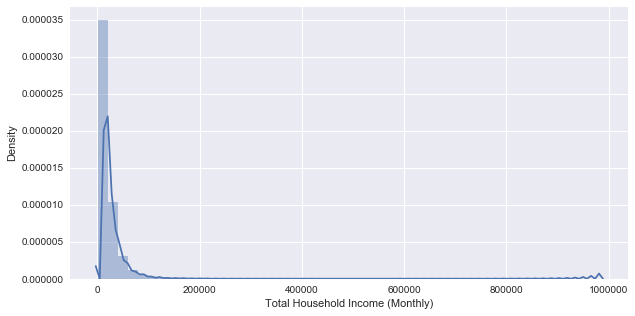

In [10]:
f, ax = plt.subplots(figsize=(10, 5))
s = sns.distplot(df[target])
s.set(ylabel='Density')
plt.show()

In [11]:
print("Skewness:", df[target].skew())

('Skewness:', 8.896631047132983)


Looking at the distribution, we see that the total household income:
- <i>Deviates from the normal distribution</i>
- <i>Has a positive skewness</i>

### Correlation Matrix

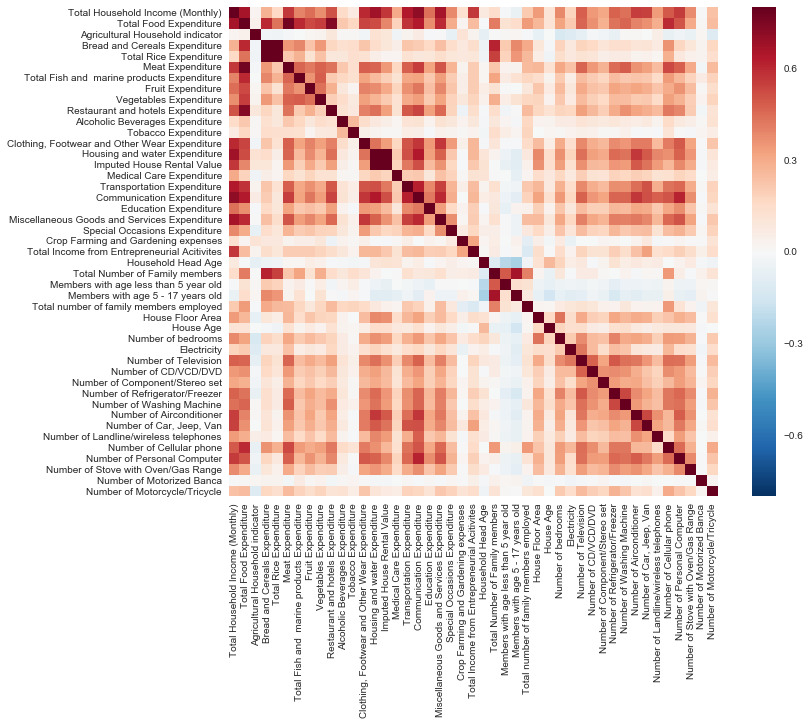

In [12]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

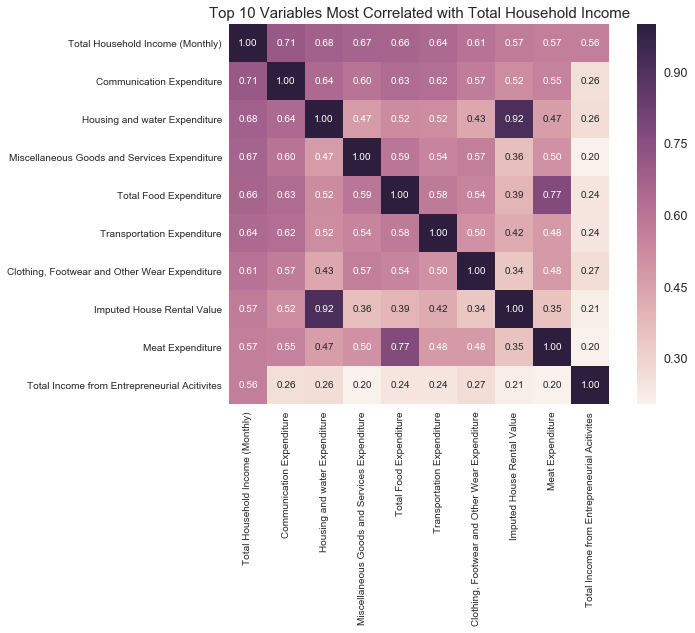

In [13]:
k = 10
corrmat = df.corr()
cols = corrmat.nlargest(k, target)[target].index
f, ax = plt.subplots(figsize=(10, 7))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
s = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
s.set_title("Top 10 Variables Most Correlated with Total Household Income", size=15)
plt.show()

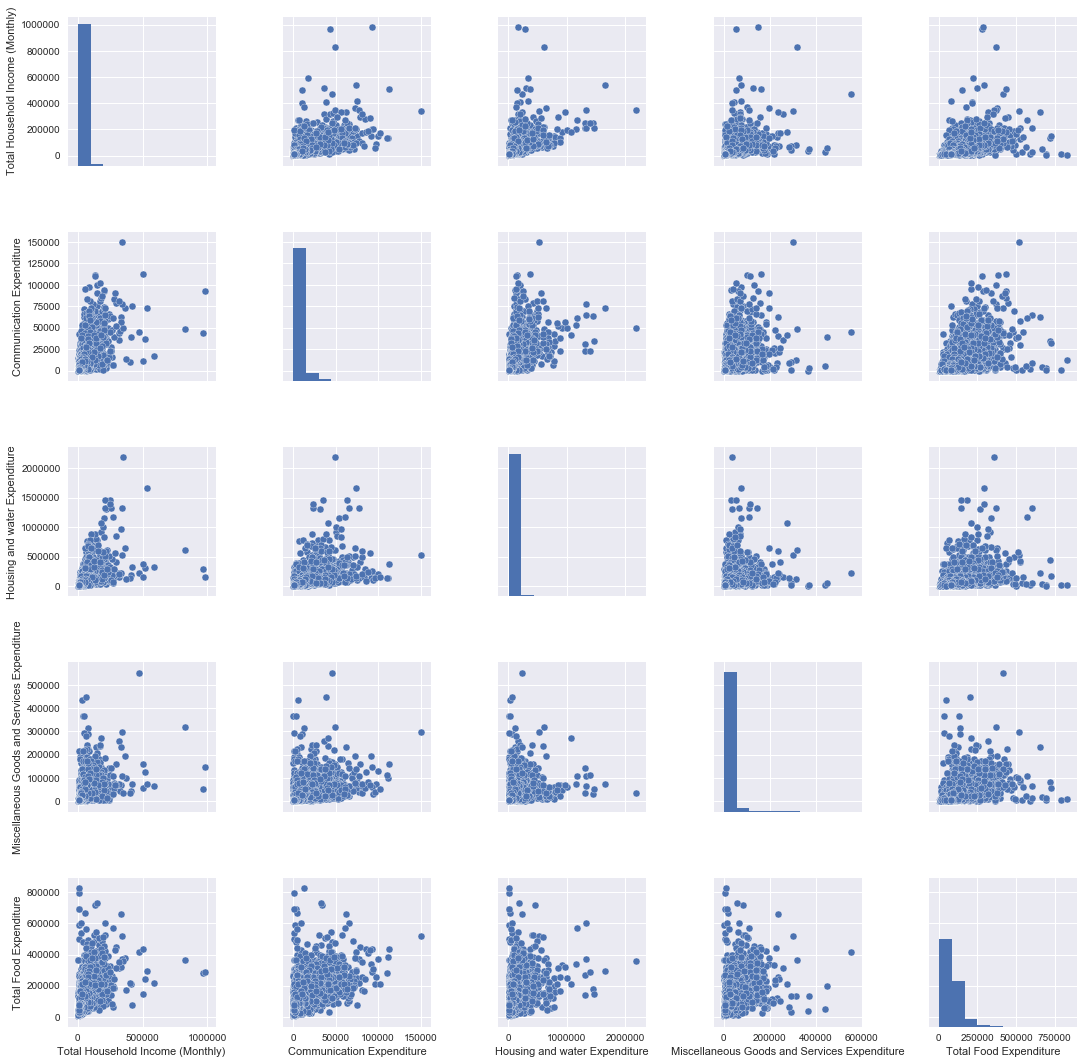

In [14]:
sns.set()
sns.pairplot(df[cols[:5]], size = 3)
plt.show();

### Household Family Information

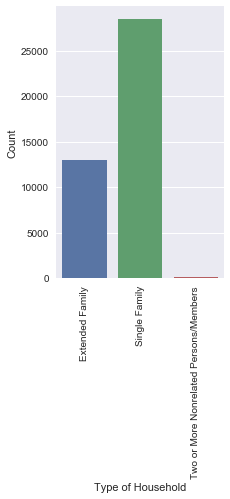

In [15]:
var = 'Type of Household'
f, ax = plt.subplots(figsize=(3, 5))
s = sns.countplot(x=var, data=df)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
s.set(ylabel='Count')
plt.show()

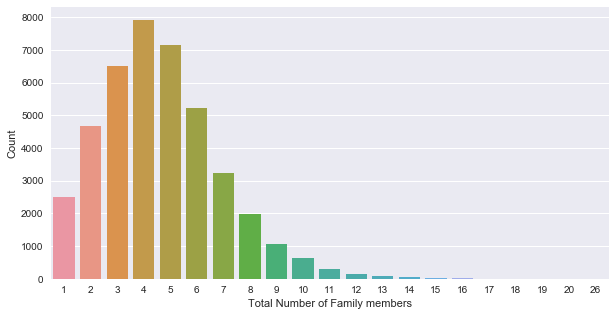

In [16]:
var = 'Total Number of Family members'
fig, ax = plt.subplots(figsize=(10,5))
s = sns.countplot(x=var, data=df)
s.set(ylabel='Count')
plt.show()

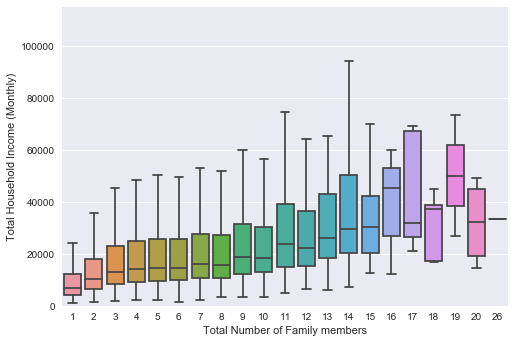

In [17]:
s = sns.boxplot(x=var, y=target, data=df, fliersize=0)
s.set(ylabel=target)
s.set_ylim(0,115000)
plt.show()

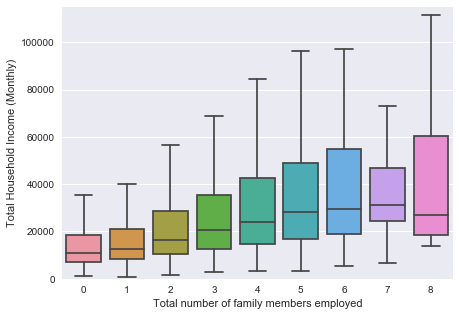

In [18]:
var = 'Total number of family members employed'
fig, ax = plt.subplots(figsize=(7,5))
s = sns.boxplot(x=var, y=target, data=df, fliersize=0)
s.set(ylabel=target)
s.set_ylim(0,115000)
plt.show()

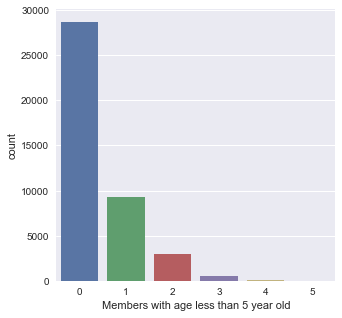

In [19]:
var = 'Members with age less than 5 year old'
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x=var, data=df)
s.set(ylabel='Count')
plt.show()

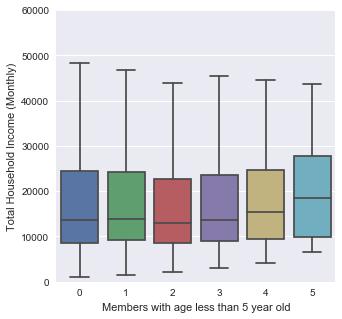

In [20]:
var = 'Members with age less than 5 year old'
fig, ax = plt.subplots(figsize=(5,5))
s = sns.boxplot(x=var, y=target, data=df, fliersize=0)
s.set_ylim(0,60000)
plt.show()

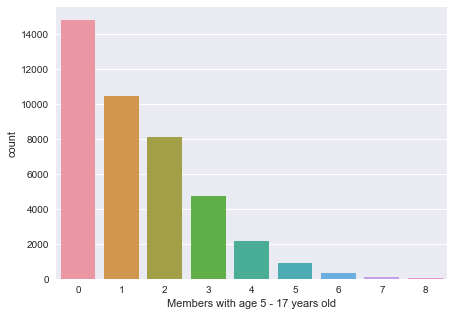

In [21]:
var = 'Members with age 5 - 17 years old'
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(x=var, data=df)
s.set(ylabel='Count')
plt.show()

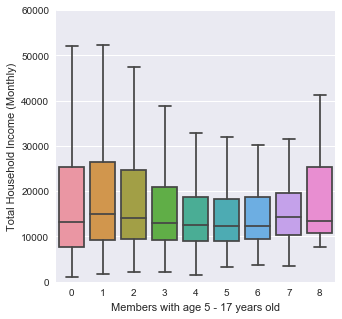

In [22]:
fig, ax = plt.subplots(figsize=(5,5))
s = sns.boxplot(x=var, y=target, data=df, fliersize=0)
s.set_ylim(0,60000)
plt.show()

### Household Head

In [23]:
var = 'Household Head Age'
ages = pd.cut(df[var], 10)

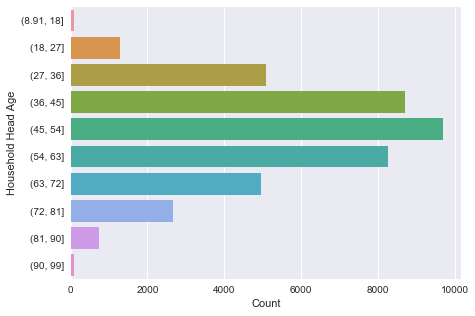

In [24]:
fig, ax = plt.subplots(figsize=(7,5))
s = sns.countplot(y=ages)
s.set(xlabel='Count')
plt.show()

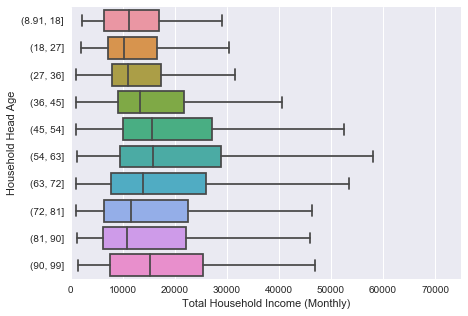

In [25]:
fig, ax = plt.subplots(figsize=(7,5))
s = sns.boxplot(y=ages, x=df[target], fliersize=0)
s.set_xlim(0,75000)
plt.show()

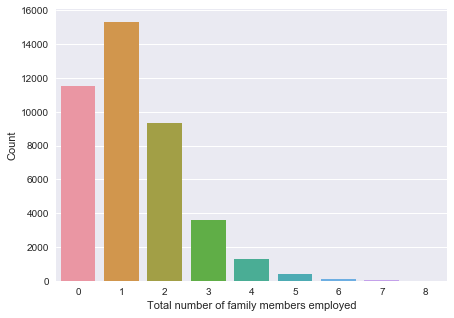

In [26]:
var = 'Total number of family members employed'
fig, ax = plt.subplots(figsize=(7,5))
s = sns.countplot(x=var, data=df)
s.set(ylabel='Count')
plt.show()

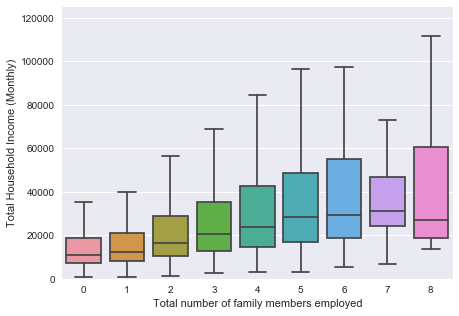

In [27]:
fig, ax = plt.subplots(figsize=(7,5))
s = sns.boxplot(x=var, y=target, data=df, fliersize=0)
s.set_ylim(0,125000)
plt.show()

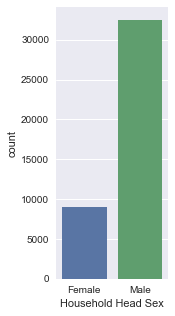

In [28]:
sex = 'Household Head Sex' 
fig, ax = plt.subplots(figsize=(2,5))
sns.countplot(x=sex, data=df)
plt.show()

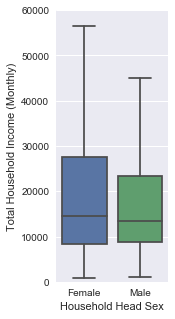

In [29]:
sex = 'Household Head Sex' 
fig, ax = plt.subplots(figsize=(2,5))
s = sns.boxplot(x=sex, y=target, data=df, fliersize=0)
s.set(ylabel=target)
s.set_ylim(0,60000)
plt.show()

<i>While there are more male household heads than female house heads, there is little difference between the amount of income earned by the male and female house heads.</i>

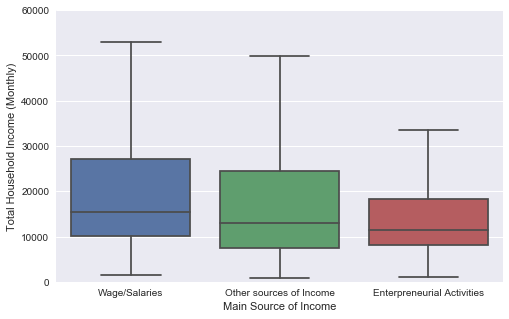

In [30]:
var = 'Main Source of Income'
fig, ax = plt.subplots(figsize=(8,5))
s = sns.boxplot(x=var, y=target, data=df, fliersize=0)
s.set_ylim(0,60000)
plt.show()

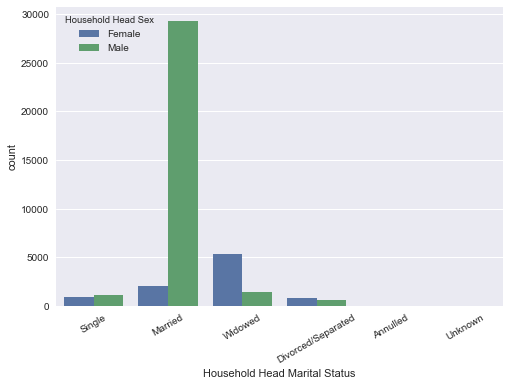

In [31]:
var = 'Household Head Marital Status'
s = sns.countplot(x=var, hue=sex, data=df)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.show()

<i>For singles and those in married relationships, there are more male household heads. However, in the case of separation or death of a partner, the female takes the lead.</i>

In [32]:
var = 'Household Head Class of Worker' 
a = df[var].astype('category').cat.categories
b = {i:df[var].value_counts()[i] for i in a}
b = sorted(b.items(), key=lambda kv: kv[1], reverse=True)
a = [i[0] for i in b if i[0] != 'Other']
c = [i[1] for i in b if i[0] != 'Other']

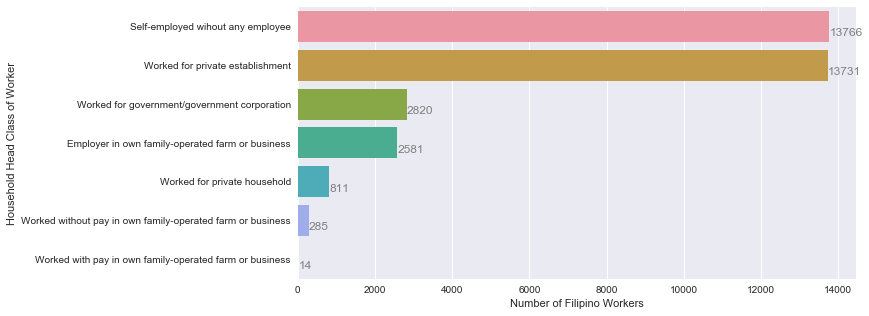

In [33]:
f, ax = plt.subplots(figsize=(10, 5))
s = sns.barplot(x=c, y=a)
s.set_yticklabels(s.get_yticklabels())
s.set(ylabel=var, xlabel='Number of Filipino Workers')
for i, v in enumerate(c):
    s.text(v + 3, i + .25, str(v), color='gray')
plt.show()

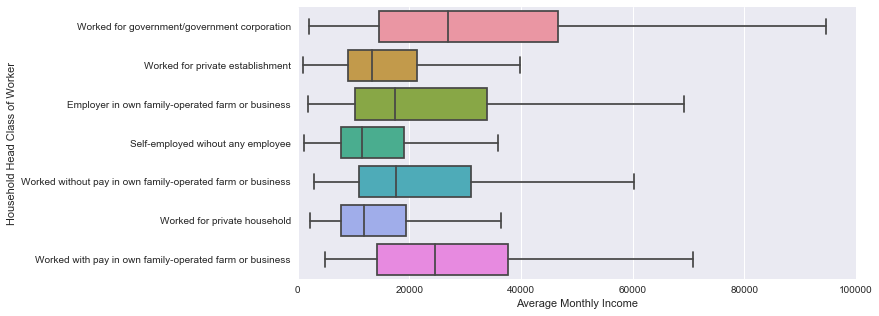

In [34]:
f, ax = plt.subplots(figsize=(10, 5))
s = sns.boxplot(y=df[var], x=df[target], fliersize=0)
s.set_yticklabels(s.get_yticklabels())
s.set(ylabel=var, xlabel='Average Monthly Income')
s.set_xlim(0, 100000)
plt.show()

### Household Head Occupation

In [35]:
var = 'Household Head Occupation' 
a = df[var].astype('category').cat.categories
b = {i:df[var].value_counts()[i] for i in a}
b = sorted(b.items(), key=lambda kv: kv[1], reverse=True)[:20]
a = [i[0] for i in b if i[0] != 'Other']
c = [i[1] for i in b if i[0] != 'Other']

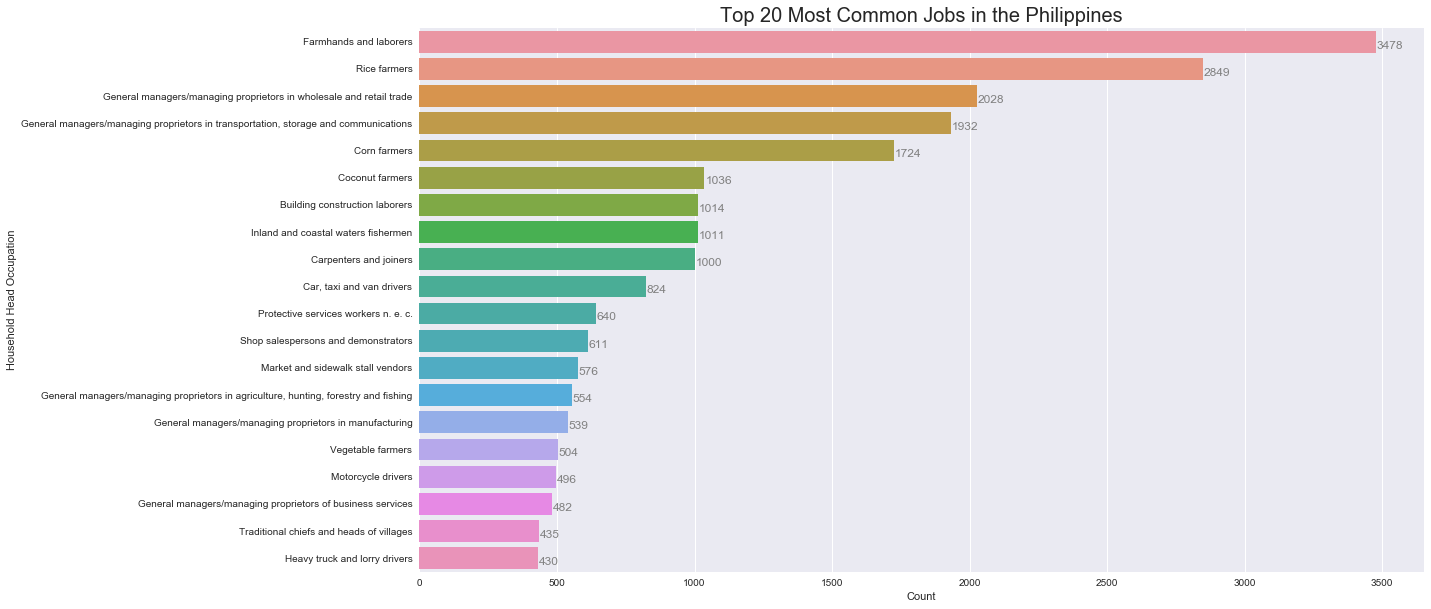

In [36]:
f, ax = plt.subplots(figsize=(18, 10))
s = sns.barplot(x=c, y=a)
s.set_yticklabels(s.get_yticklabels())
s.set(ylabel=var, xlabel='Count')
s.set_title("Top 20 Most Common Jobs in the Philippines", size=20)
for i, v in enumerate(c):
    s.text(v + 3, i + .25, str(v), color='gray')
plt.show()

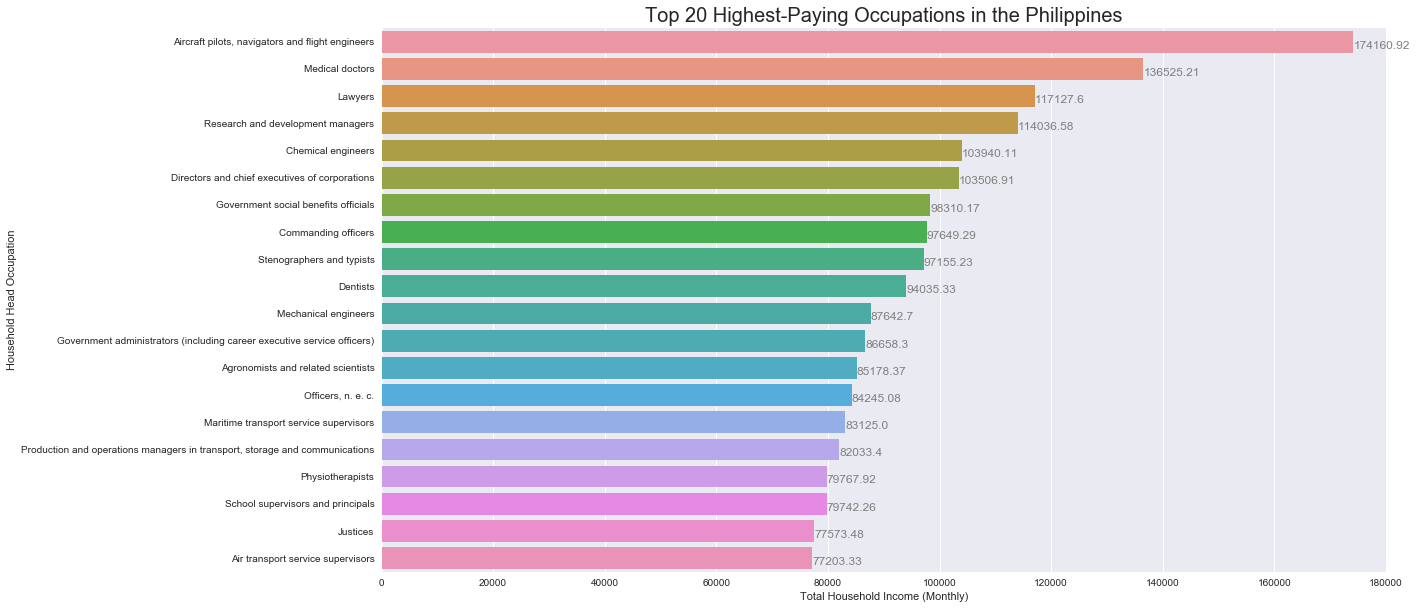

In [37]:
var = 'Household Head Occupation' 
a = df[var].astype('category').cat.categories
b = {i:df[df[var]==i][target].mean() for i in a}
b = sorted(b.items(), key=lambda kv: kv[1], reverse=True)
d = [i for i in b[:20]]
a = [i[0] for i in d]
c = [i[1] for i in d]
f, ax = plt.subplots(figsize=(18, 10))
s = sns.barplot(x=c, y=a)
s.set_yticklabels(s.get_yticklabels())
s.set(ylabel=var, xlabel=target)
s.set_title("Top 20 Highest-Paying Occupations in the Philippines", size=20)
for i, v in enumerate(c):
    s.text(v + 3, i + .25, str(round(v,2)), color='gray')
s.set_xlim(0,180000)
plt.show()

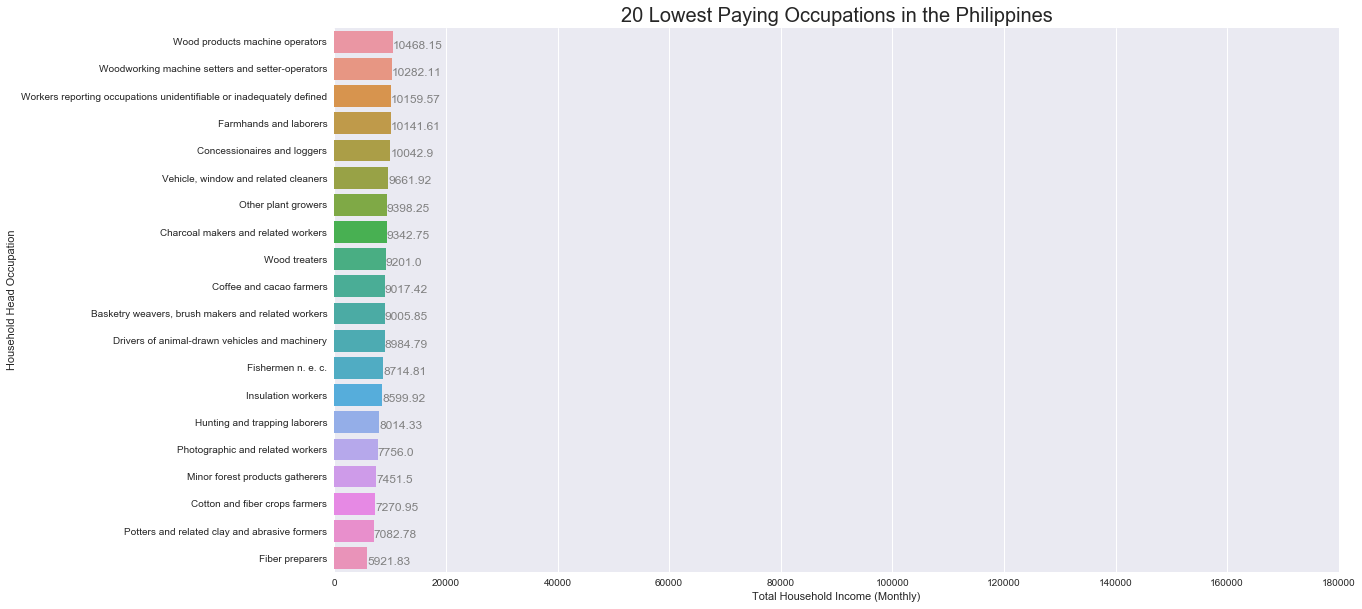

In [38]:
var = 'Household Head Occupation' 
a = df[var].astype('category').cat.categories
b = {i:df[df[var]==i][target].mean() for i in a}
b = sorted(b.items(), key=lambda kv: kv[1], reverse=True)
d = [i for i in b[-20:]]
a = [i[0] for i in d]
c = [i[1] for i in d]
f, ax = plt.subplots(figsize=(18, 10))
s = sns.barplot(x=c, y=a)
s.set_yticklabels(s.get_yticklabels())
s.set(ylabel=var, xlabel=target)
s.set_title("20 Lowest Paying Occupations in the Philippines", size=20)
for i, v in enumerate(c):
    s.text(v + 3, i + .25, str(round(v,2)), color='gray')
s.set_xlim(0,180000)
plt.show()

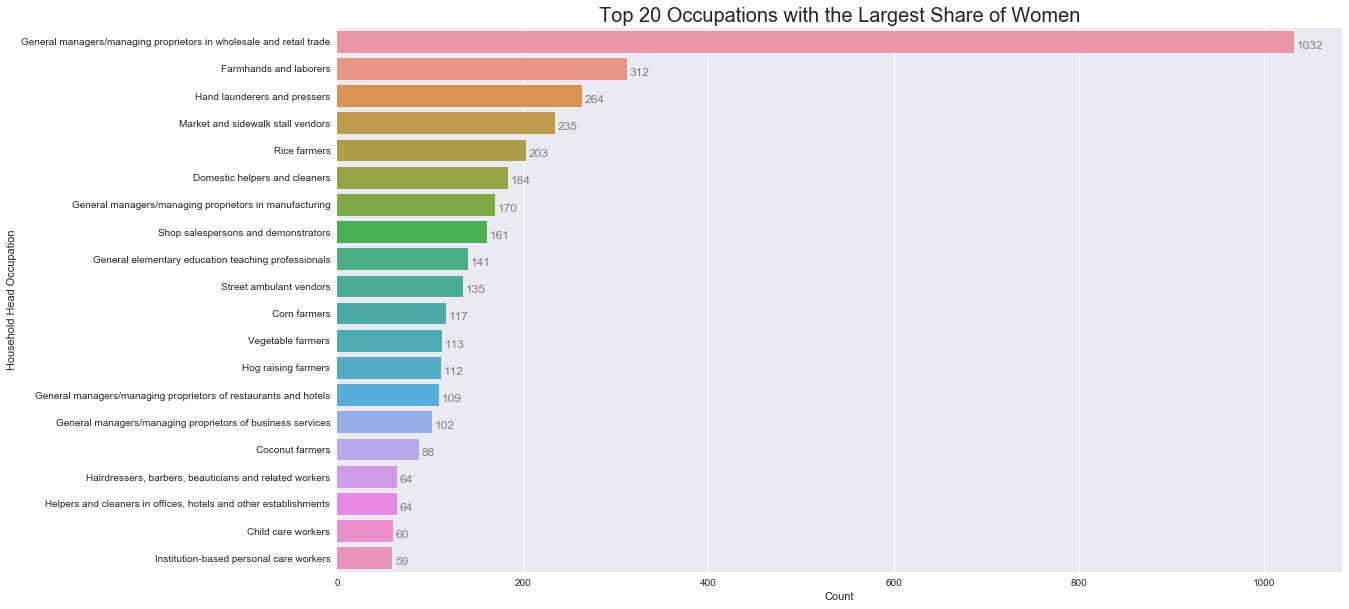

In [39]:
var = 'Household Head Occupation' 
a = df[var].astype('category').cat.categories
fems = df[df[sex] == 'Female'][var].value_counts()
b = {i:fems[i] for i in a if i in fems}
b = sorted(b.items(), key=lambda kv: kv[1], reverse=True)
d = [i for i in b[:20]]
a = [i[0] for i in d if i[0] != 'Other']
c = [i[1] for i in d if i[0] != 'Other']
f, ax = plt.subplots(figsize=(18, 10))
s = sns.barplot(x=c, y=a)
s.set_yticklabels(s.get_yticklabels())
s.set(ylabel=var, xlabel='Count')
s.set_title("Top 20 Occupations with the Largest Share of Women", size=20)
for i, v in enumerate(c):
    s.text(v + 3, i + .25, str(v), color='gray')
plt.show()

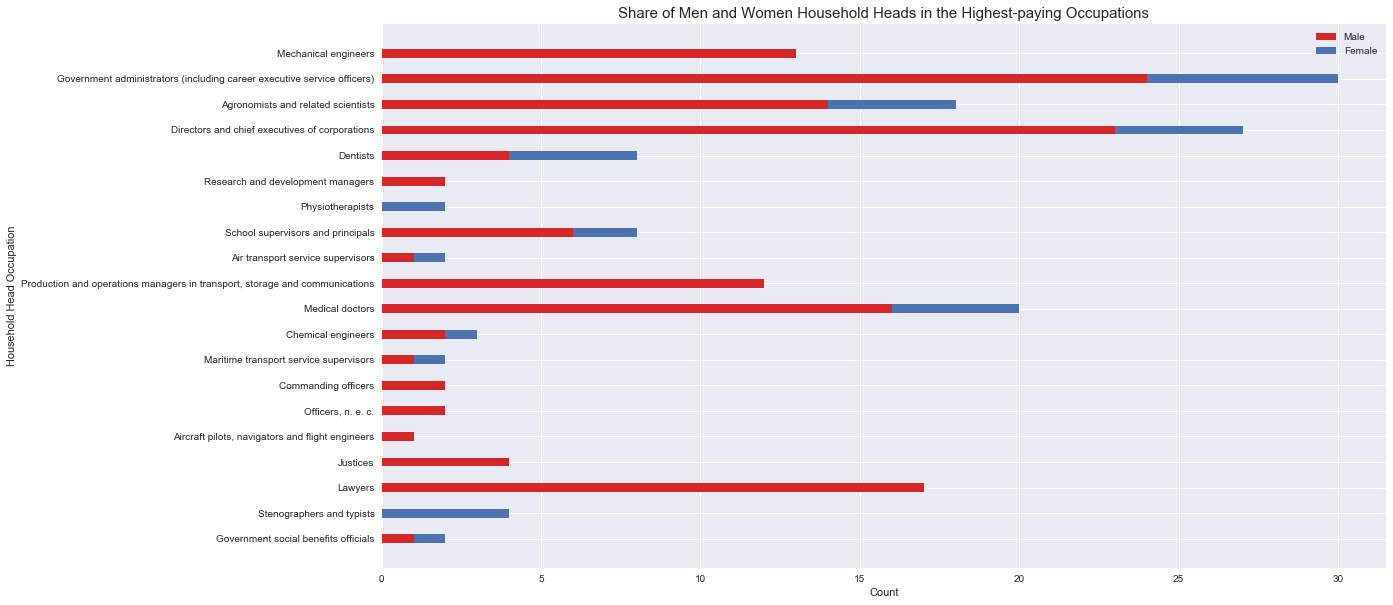

In [40]:
var = 'Household Head Occupation' 
a = df[var].astype('category').cat.categories
f, ax = plt.subplots(figsize=(18, 10))
b = {i:df[df[var]==i][target].mean() for i in a}
b = sorted(b.items(), key=lambda kv: kv[1], reverse=True)
d = [i for i in b[:20]]
a = [i[0] for i in d]
occs = {i:dict(df[df[var]==i][sex].value_counts()) for i in a}
c = [i[1] for i in d]

menMeans = []
womenMeans = []
for i in occs:
    male, female = 0, 0
    if 'Male' in occs[i]: male = occs[i]['Male']
    if 'Female' in occs[i]: female = occs[i]['Female']
    menMeans.append(male)
    womenMeans.append(female)

N = len(occs)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, menMeans, width, color='#d62728')
p2 = plt.barh(ind, womenMeans, width,left=menMeans)

plt.ylabel(var)
plt.xlabel('Count')
plt.title('Share of Men and Women Household Heads in the Highest-paying Occupations', size = 15)
plt.yticks(ind, [i for i in occs])
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Male', 'Female'))

plt.show()

In [41]:
var = 'Household Head Highest Grade Completed'
df[var] = df[var].replace('Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree (HIgher Education Level, First Stage, or Collegiate Education Level)', 'Programs of Education at the Third Level');
df[var] = df[var].replace('Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree', 'Third Level that Leads to Non-Baccalureate Award')

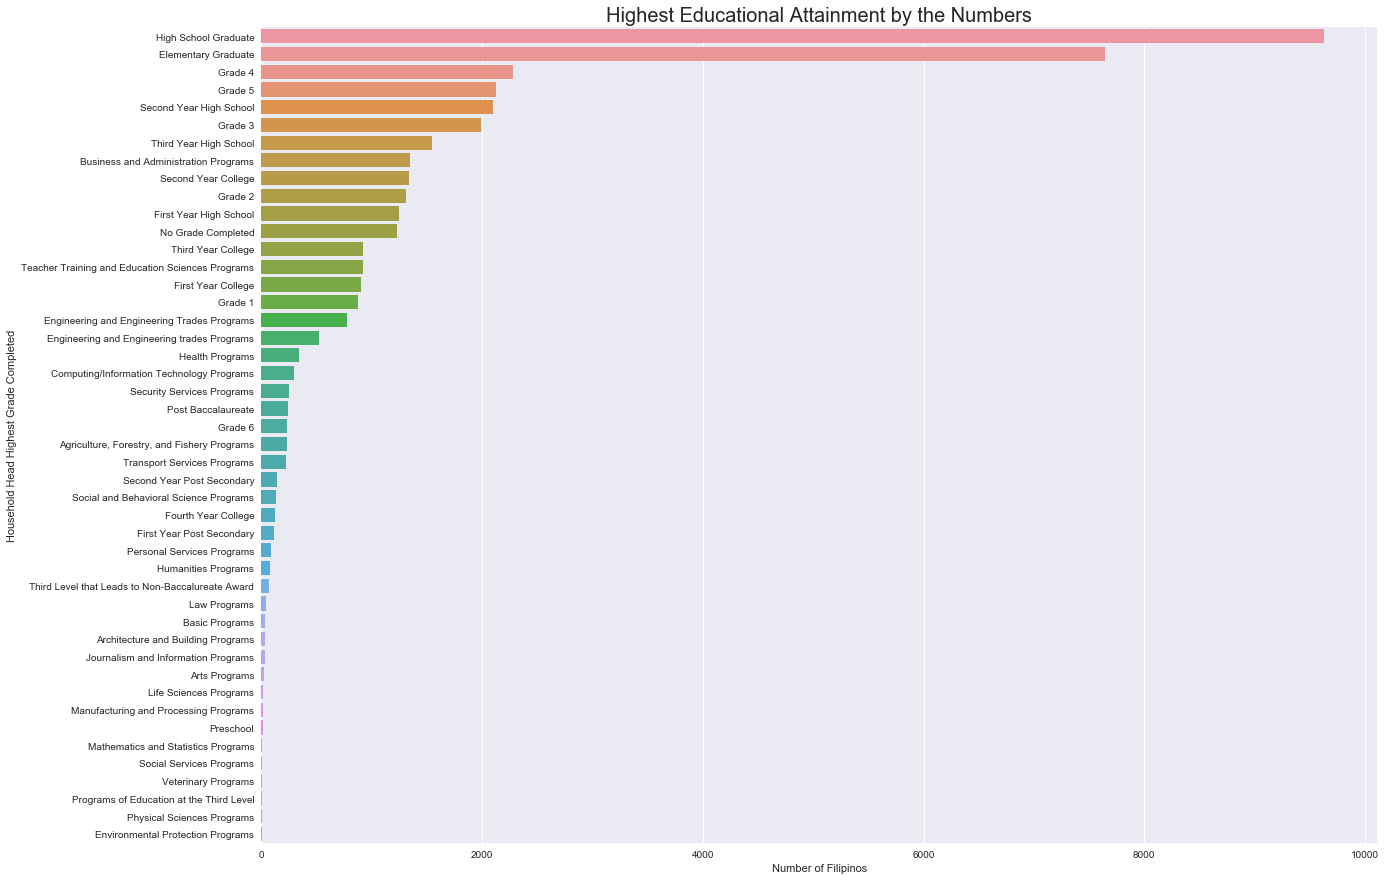

In [42]:
var = 'Household Head Highest Grade Completed' 
f, ax = plt.subplots(figsize=(20, 15))
s = sns.countplot(y=var, data=df, order=df[var].value_counts().index)
s.set_yticklabels(s.get_yticklabels())
s.set(ylabel=var, xlabel='Number of Filipinos')
s.set_title("Highest Educational Attainment by the Numbers", size=20)
plt.show()

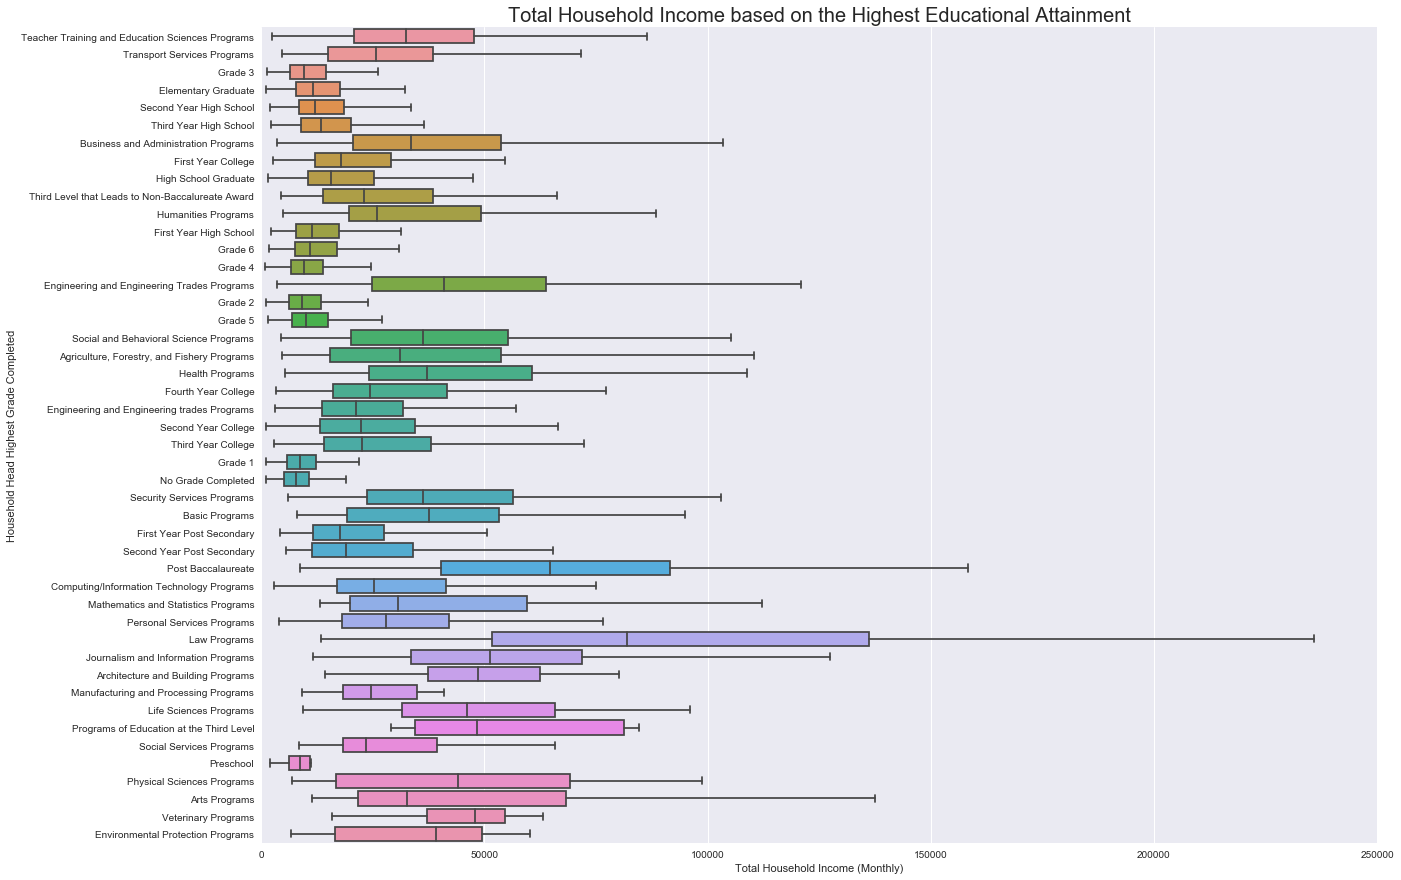

In [43]:
var = 'Household Head Highest Grade Completed' 
f, ax = plt.subplots(figsize=(20, 15))
s = sns.boxplot(y=var, x=target, data=df, fliersize=0)
s.set_yticklabels(s.get_yticklabels())
s.set(ylabel=var, xlabel=target)
s.set_xlim(0,250000)
s.set_title("Total Household Income based on the Highest Educational Attainment", size=20)
plt.show()

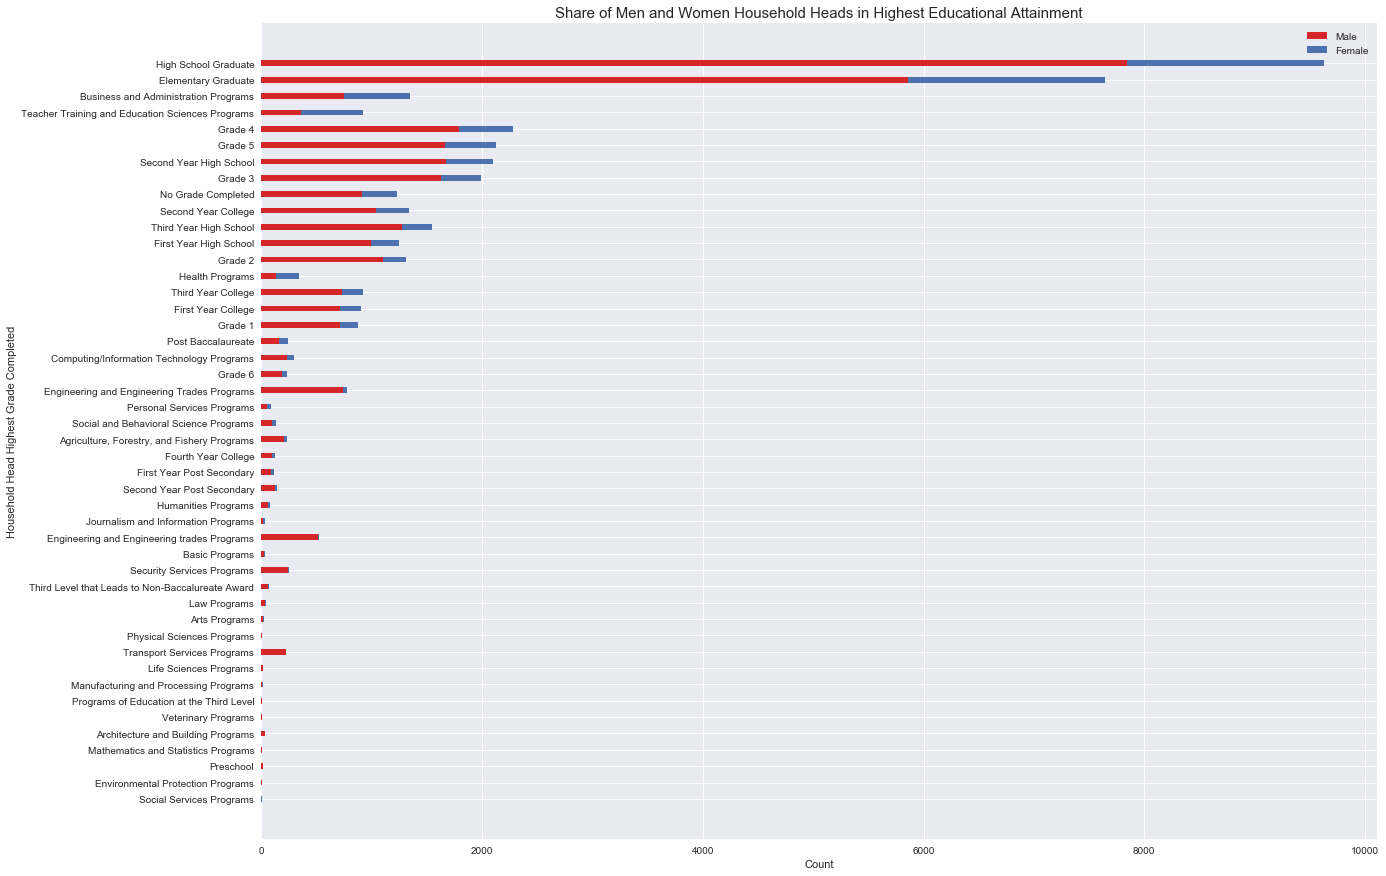

In [44]:
var = 'Household Head Highest Grade Completed' 
f, ax = plt.subplots(figsize=(20, 15))
a = df[var].astype('category').cat.categories
b = {i:dict(df[df[var]==i][sex].value_counts()) for i in a}
b = sorted(b.items(), key=lambda kv: kv[1], reverse=False)

menMeans = []
womenMeans = []
for i in b:
    male, female = 0, 0
    if 'Male' in i[1]: male = i[1]['Male']
    if 'Female' in i[1]: female = i[1]['Female']
    menMeans.append(male)
    womenMeans.append(female)

N = len(b)
ind = np.arange(N)    # the x locations for the groups
width = 0.35      # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, np.array(menMeans), width, color='#d62728')
p2 = plt.barh(ind, np.array(womenMeans), width, left=menMeans)

plt.ylabel(var)
plt.title('Share of Men and Women Household Heads in Highest Educational Attainment', size = 15)
plt.yticks(ind, [i[0] for i in b])
plt.legend((p1[0], p2[0]), ('Male', 'Female'))
plt.ylabel(var)
plt.xlabel('Count')
plt.show()

### Income and Expenditures of Households Per Region

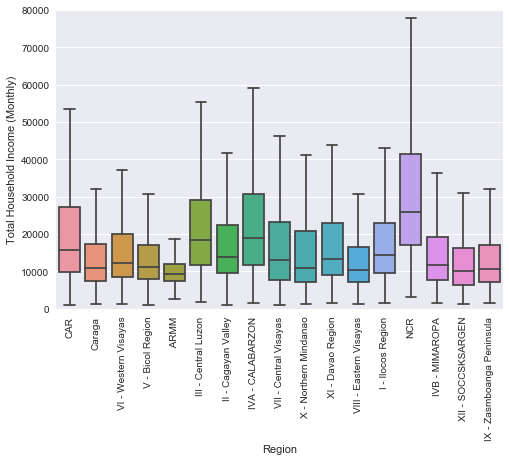

In [45]:
var = 'Region' 
s = sns.boxplot(x=var, y=target, data=df, fliersize=0)
s.set(ylabel=target)
s.set_ylim(0,80000)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

<i>Families residing in NCR (Metro Manila) enjoy an overall greater total household income. The runner up is CALABARZON, which is about an hour or two from Metro Manila. </i>

In [129]:
# Source: https://stackoverflow.com/questions/42227409/tutorial-for-python-radar-chart-plot
def radar_plot():
    
    regions = df['Region'].astype('category').cat.categories.tolist()
    region_dict = {i:region for i,region in enumerate(regions)}
    fig, ax = plt.subplots(int(len(regions)) , 1)
    fig.subplots_adjust(hspace=0.5)
    fig.set_figheight(100)
    fig.set_figwidth(100)

    for i in range(0, len(regions)):
        title = region_dict[i]
        var = 'Region'
        regions = df['Region'].astype('category').cat.categories.tolist()
        cat = [c for c in df.columns if ('Expenditure' in c)]
        values = [df[df[var]==regions[i]][c].mean() for c in cat]

        N = len(cat)
        x_as = [n / float(N) * 2 * pi for n in range(N)]
        values += values[:1]
        x_as += x_as[:1]

        # Set color of axes
        plt.rc('axes', linewidth=0.5, edgecolor="#888888")

        # Create polar plot
        ax = plt.subplot(int(len(regions)), 1, i+1, polar=True)

        # Set clockwise rotation. That is:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)

        # Set position of y-labels
        ax.set_rlabel_position(0)

        # Set color and linestyle of grid
        ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
        ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)

        # Set number of radial axes and remove labels
        plt.xticks(x_as[:-1], [])

        # Set yticks
        max_ = 11
        plt.yticks([x*10000 for x in range(1,max_+1) if x %2 == 0], [str(x)+ "e4"for x in range(1,max_+1) if x %2 == 0], size=10)

        # Plot data
        ax.plot(x_as, values, linewidth=0, linestyle='solid', zorder=3)

        # Fill area
        ax.fill(x_as, values, 'b', alpha=0.5)

        # Set axes limits
        max_val = max_*10000
        plt.ylim(0, max_val)

        # Draw ytick labels to make sure they fit properly
        for i in range(N):
            angle_rad = i / float(N) * 2 * pi

            if angle_rad == 0:
                ha, distance_ax = "center", 15000
            elif 0 < angle_rad < pi:
                ha, distance_ax = "left", 100
            elif angle_rad == pi:
                ha, distance_ax = "center", 15000
            else:
                ha, distance_ax = "right", 100

            ax.text(angle_rad, max_val + distance_ax + 15000, cat[i], size=10, horizontalalignment=ha, verticalalignment="center")

        plt.title('Expenditures of Region ' + title)

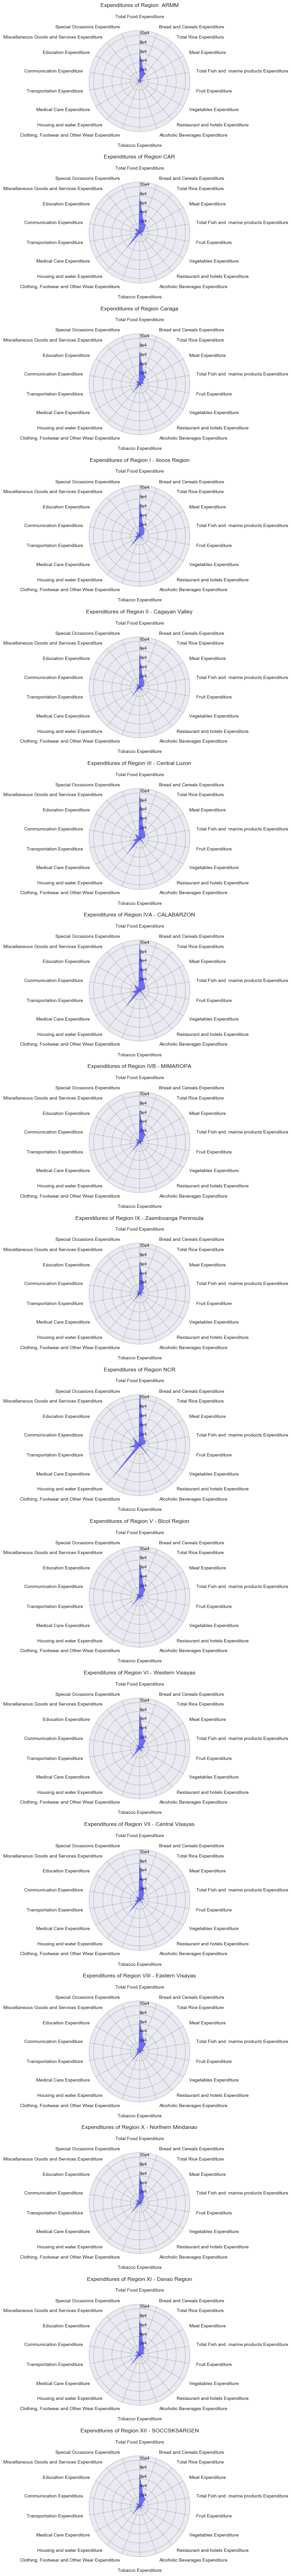

In [130]:
radar_plot()
plt.show()

<i>Interesting observation: On average, Metro Manila seems to spend more on meat than rice!</i>

### Housing and Utilities Information

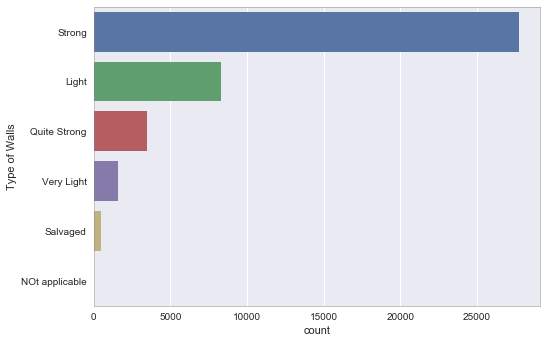

In [48]:
var = 'Type of Walls'
s = sns.countplot(y=var, data=df)
plt.show()

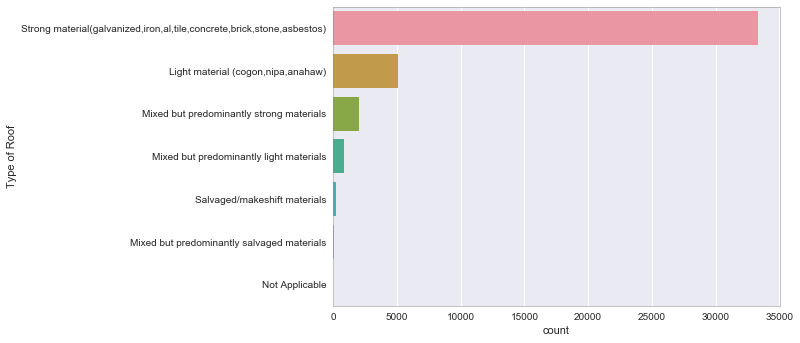

In [49]:
var = 'Type of Roof'
s = sns.countplot(y=var, data=df)
plt.show()

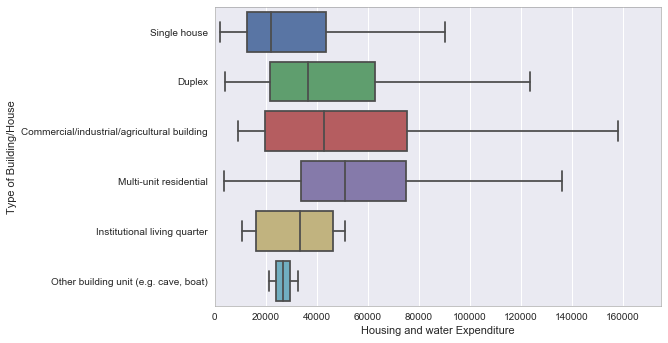

In [50]:
var = 'Type of Building/House'
target_ = 'Housing and water Expenditure'
s = sns.boxplot(y=var, x=target_, data=df, fliersize=0)
s.set_xlim(0,175000)
s.set_yticklabels(s.get_yticklabels())
plt.show()

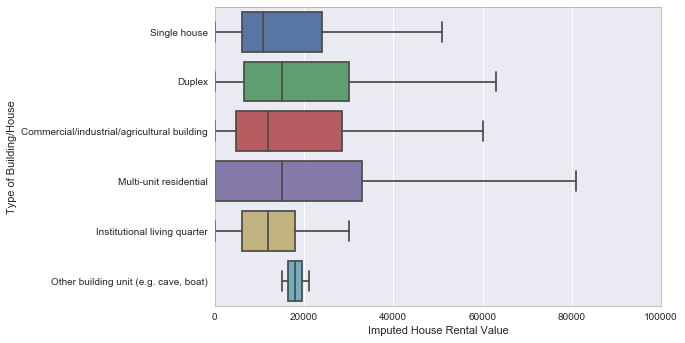

In [51]:
var = 'Type of Building/House'
target_ = 'Imputed House Rental Value'
s = sns.boxplot(y=var, x=target_, data=df, fliersize=0)
s.set_xlim(0,100000)
s.set_yticklabels(s.get_yticklabels())
plt.show()

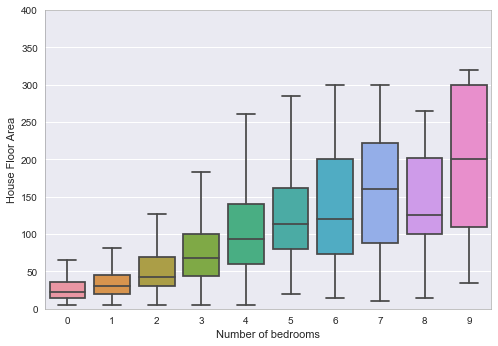

In [52]:
var = 'Number of bedrooms'
target_ = 'House Floor Area'
s = sns.boxplot(x=var, y=target_, data=df, fliersize=0)
s.set_ylim(0,400)
plt.show()

## Missing Values

In [53]:
df.isnull().sum()

Total Household Income (Monthly)                    0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

In [54]:
df['Household Head Occupation'] = df['Household Head Occupation'].replace(np.nan, 'Other');
df['Household Head Class of Worker'] = df['Household Head Class of Worker'].replace(np.nan, 'Other');

## Classification Task

I'll start by binning the Total Household Income values into one of three categories:

1. <b>Low Income</b>: Income <= P20,000.00 per month
2. <b>High Income</b>: Income > P20,000.00 per month

In [55]:
y = df[target]
X = df[df.columns.difference([target])]

In [56]:
bins = [0, 15000, 100000000]
y = pd.cut(y, bins, labels=["low income", "high income"])
#y = y.astype('object')

In [57]:
y.value_counts()

low income     22774
high income    18770
Name: Total Household Income (Monthly), dtype: int64

In [58]:
cols = list(X.columns[X.dtypes != object])
std_scale = preprocessing.StandardScaler().fit(X[cols])
X[cols] = pd.DataFrame(std_scale.transform(X[cols]), columns=cols)

C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [59]:
cols = list(X.columns[X.dtypes == object])
X = pd.DataFrame(pd.get_dummies(X, prefix=cols, columns=cols))

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Columns: 556 entries, Agricultural Household indicator to Type of Walls_Very Light
dtypes: float64(44), uint8(512)
memory usage: 34.2 MB


In [61]:
X.describe(include='all')

,Agricultural Household indicator,Alcoholic Beverages Expenditure,Bread and Cereals Expenditure,"Clothing, Footwear and Other Wear Expenditure",Communication Expenditure,Crop Farming and Gardening expenses,Education Expenditure,Electricity,Fruit Expenditure,House Age,...,Type of Roof_Mixed but predominantly strong materials,Type of Roof_Not Applicable,Type of Roof_Salvaged/makeshift materials,"Type of Roof_Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)",Type of Walls_Light,Type of Walls_NOt applicable,Type of Walls_Quite Strong,Type of Walls_Salvaged,Type of Walls_Strong,Type of Walls_Very Light
count,4.154400e+04,4.154400e+04,4.154400e+04,4.154400e+04,4.154400e+04,4.154400e+04,4.154400e+04,4.154400e+04,4.154400e+04,4.154400e+04,...,41544.00000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,1.305709e-13,-1.953099e-16,-1.394994e-18,-4.104891e-16,2.939729e-15,-4.922010e-15,-3.028752e-15,2.539598e-14,1.220219e-17,6.259489e-16,...,0.04819,0.000289,0.005103,0.802571,0.198994,0.000289,0.083935,0.010976,0.667702,0.038104
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,...,0.21417,0.016993,0.071254,0.398064,0.399248,0.016993,0.277294,0.104193,0.471043,0.191450
min,-6.352652e-01,-4.990182e-01,-1.866414e+00,-6.609324e-01,-5.611236e-01,-2.900069e-01,-3.522094e-01,-2.856349e+00,-8.588276e-01,-1.407843e+00,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.352652e-01,-4.990182e-01,-6.369760e-01,-4.788453e-01,-4.838499e-01,-2.900069e-01,-3.522094e-01,3.500973e-01,-5.137610e-01,-7.083111e-01,...,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-6.352652e-01,-3.748464e-01,-1.343889e-01,-2.954242e-01,-3.547864e-01,-2.900069e-01,-3.107369e-01,3.500973e-01,-2.459746e-01,-2.186390e-01,...,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8.425855e-01,9.850134e-02,4.682256e-01,8.342378e-02,-2.678438e-02,-1.575064e-01,-1.608706e-01,3.500973e-01,1.850429e-01,4.109394e-01,...,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2.320436e+00,2.690709e+01,5.500614e+01,4.692851e+01,1.998216e+01,7.799970e+01,3.409818e+01,3.500973e-01,9.132807e+01,1.258279e+01,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
#pca = decomposition.PCA(n_components=100)
#X = pca.fit_transform(X)

In [63]:
def train(X, y):
    test_size = 0.2
    seed = 42
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    classifiers = dict() 
    classifiers['GaussianNB'] = GaussianNB()
    classifiers['SVM'] = SVC()
    classifiers['MLPClassifier'] = MLPClassifier()
    classifiers['RandomForestClassifier'] = RandomForestClassifier(n_estimators=300)

    # Iterate over dictionary
    for clf_name, clf in classifiers.items(): #clf_name is the key, clf is the value
        scores = cross_val_score(clf, X, y, cv=5)
        print(clf_name + ' cross_val_score: ' + str(np.mean(scores)))
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        score = metrics.accuracy_score(y_test, pred)
        print(clf_name + ': ' + str(score))
        print(metrics.classification_report(y_test, pred))
        

In [64]:
#train(X, y)